# Análise de Dados - TABNET DataSus

Análise de dados utilizados no TabNet (Sistema de acesso ao Banco de Dados do DataSUS). Relacionado aos gastos hospitalares SIH/SUS a partir do ano de 2008.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [35]:
dados = pd.read_csv("DataBase/Arquivo_Base.csv",engine ="python", encoding = "utf 16", sep = ";", thousands =".", decimal= ",")


In [36]:
pd.options.display.float_format = "{:.2f}".format

In [37]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71


In [38]:
dados.shape

(28, 154)

In [39]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,...,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,29173204.23,43798162.09,47431647.03,49047347.24,51128831.39,53727254.55,54642163.20,53614903.45,53783045.87,52358504.70,...,93829097.81,91092798.86,94786619.53,91835633.04,91787782.72,79097773.61,85230579.37,91279275.04,105098486.60,11559339896.72
std,76667357.26,115628427.67,124986257.70,129172567.52,135372919.41,142048500.46,144456261.46,141531618.78,142068152.68,138165570.51,...,246737918.25,239580294.96,249584500.04,241588588.10,241680452.28,208101004.67,224200459.80,240448076.88,277431129.41,30493463477.16
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,2310514.38,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,2009912.57,3015488.30,291637984.75
25%,4743321.75,7089861.08,8119037.40,8660426.95,8881584.03,9670475.96,9317472.61,9325186.73,9285413.23,9315522.37,...,15794759.18,14858542.53,15826154.60,15013575.06,14807176.52,12466347.77,13367739.18,14198102.19,17496608.83,1970606556.25
50%,9354072.44,10733101.36,11202941.23,11953681.16,12553413.41,13107191.98,12895393.93,13291718.13,12946269.75,13908667.54,...,24740418.02,24197229.91,25500206.29,23966573.47,24740314.89,23164715.42,24339506.48,25823490.27,29919471.05,2808280663.66
75%,19451438.70,26348652.40,31038847.91,35861382.01,34848382.22,35935814.18,36384654.36,38325591.06,36472040.92,34448205.56,...,70833487.87,67032485.88,70859526.25,66128856.13,67934807.61,54321421.94,60130925.51,65382516.02,76642634.16,8333666388.08
max,408424859.23,613174269.21,664043058.38,686662861.42,715803639.49,752181563.64,764990284.76,750608648.28,752962642.15,733019065.83,...,1313607369.36,1275299183.98,1327012673.40,1285698862.52,1285028958.07,1107368830.53,1193228111.21,1277909850.50,1471378812.46,161830758554.04


In [40]:
dados["2008/Fev"].mean()

43798162.086428575

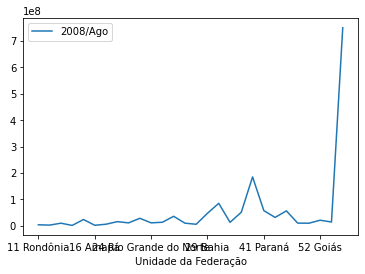

In [41]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

In [42]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,34873099.14,35775375.69,35005746.36,34793993.14,30896577.34,34305180.56,35701473.15,39405050.36,43984702.05,4657350310.70
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,18769437.77,22341629.09,20643441.06,22947163.99,21536505.16,19058243.91,22704335.27,25269773.34,26526196.39,2429933198.76
27,Total,408424859.23,613174269.21,664043058.38,686662861.42,715803639.49,752181563.64,764990284.76,750608648.28,752962642.15,...,1275299183.98,1327012673.40,1285698862.52,1285028958.07,1107368830.53,1193228111.21,1277909850.50,1471378812.46,1469130891.63,161830758554.04


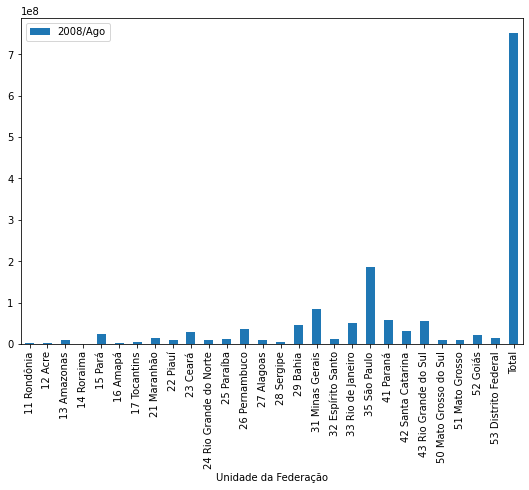

In [44]:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))

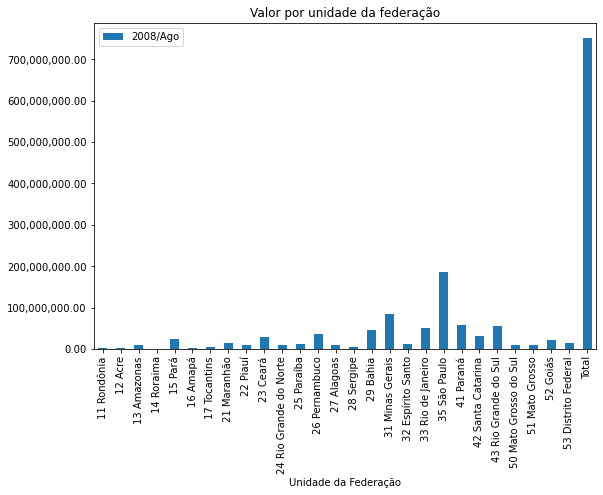

In [46]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

### Desafio: escolher um título mais descritivo, que passe a mensagem adequada.
### Desafio: faça a mesma análise para o mês mais recente.